# Dataset Exploration -  N-CMAPSS DS02

The new C-MAPSS dataset DS02 from NASA provides degradation trajectories of 9 turbofan engines with unknown and different initial health condition for complete flights and two failure modes (HPT efficiency degradation & HPT efficiency degradation combined with LPT efficiency and capacity degradation). The data were synthetically generated with the Commercial Modular Aero-Propulsion System Simulation (C-MAPSS) dynamical model. The data contains multivariate sensors readings of the complete run-to-failure trajectories. Therefore, the records stop at the cycle/time the engine failed. A total number of 6.5M time stamps are available.

Copyright (c) by Manuel Arias.

In [6]:
import os
import h5py
import time
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import DataFrame
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

## Dataset Download
copy the prsigned url in the chat and run the command 

wget <'Presigned URL'>

In [2]:
## Run the above command here
! wget <Paste Url Here> 

In [7]:
pwd

'/home/ec2-user/SageMaker'

## Create a bucket in your aws account
You can do this directly in the console, or using aws command line or boto3, here we will do it using the quick command line

In [ ]:
!aws s3 create-bucket --bucket pw-smdemo-<yourInitials>

In [8]:
input_bucket = 'pw-smdemo-<yourInitials>'
#input_bucket='mobazhar-engine-flight-data'

In [9]:
### Set-up - Define file location
filename = 'N-CMAPSS_DS02-006.h5'

#### Read Raw Data

In [10]:
# Time tracking, Operation time (min):  0.003
t = time.process_time()  

# Load data
with h5py.File(filename, 'r') as hdf:
        # Development set
        W_dev = np.array(hdf.get('W_dev'))             # W
        X_s_dev = np.array(hdf.get('X_s_dev'))         # X_s
        X_v_dev = np.array(hdf.get('X_v_dev'))         # X_v
        T_dev = np.array(hdf.get('T_dev'))             # T
        Y_dev = np.array(hdf.get('Y_dev'))             # RUL  
        A_dev = np.array(hdf.get('A_dev'))             # Auxiliary

        # Test set
        W_test = np.array(hdf.get('W_test'))           # W
        X_s_test = np.array(hdf.get('X_s_test'))       # X_s
        X_v_test = np.array(hdf.get('X_v_test'))       # X_v
        T_test = np.array(hdf.get('T_test'))           # T
        Y_test = np.array(hdf.get('Y_test'))           # RUL  
        A_test = np.array(hdf.get('A_test'))           # Auxiliary
        
        # Varnams
        W_var = np.array(hdf.get('W_var'))
        X_s_var = np.array(hdf.get('X_s_var'))  
        X_v_var = np.array(hdf.get('X_v_var')) 
        T_var = np.array(hdf.get('T_var'))
        A_var = np.array(hdf.get('A_var'))
        
        # from np.array to list dtype U4/U5
        W_var = list(np.array(W_var, dtype='U20'))
        X_s_var = list(np.array(X_s_var, dtype='U20'))  
        X_v_var = list(np.array(X_v_var, dtype='U20')) 
        T_var = list(np.array(T_var, dtype='U20'))
        A_var = list(np.array(A_var, dtype='U20'))
                          
W = np.concatenate((W_dev, W_test), axis=0)  
X_s = np.concatenate((X_s_dev, X_s_test), axis=0)
X_v = np.concatenate((X_v_dev, X_v_test), axis=0)
T = np.concatenate((T_dev, T_test), axis=0)
Y = np.concatenate((Y_dev, Y_test), axis=0) 
A = np.concatenate((A_dev, A_test), axis=0) 
    
print('')
print("Operation time (min): " , (time.process_time()-t)/60)
print('')
print ("W shape: " + str(W.shape))
print ("X_s shape: " + str(X_s.shape))
print ("X_v shape: " + str(X_v.shape))
print ("T shape: " + str(T.shape))
print ("A shape: " + str(A.shape))


Operation time (min):  0.04586466613333333

W shape: (6779656, 4)
X_s shape: (6779656, 14)
X_v shape: (6779656, 14)
T shape: (6779656, 10)
A shape: (6779656, 4)


## Auxiliary Information ($A$)

Has each unit, it's cycle number, Flight Class and Health state.

In [11]:
df_A = DataFrame(data=A, columns=A_var)
df_A.describe()

,unit,cycle,Fc,hs
count,6.779656e+06,6.779656e+06,6.779656e+06,6.779656e+06
mean,5.264890e+00,3.908919e+01,2.236564e+00,2.762460e-01
std,2.911893e+00,2.292731e+01,8.064446e-01,4.471400e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,2.000000e+00,2.000000e+01,2.000000e+00,0.000000e+00
50%,6.000000e+00,3.900000e+01,2.000000e+00,0.000000e+00
75%,8.000000e+00,5.800000e+01,3.000000e+00,1.000000e+00
max,1.000000e+01,9.900000e+01,3.000000e+00,1.000000e+00


In [12]:
df_A.head()

,unit,cycle,Fc,hs
0,1.0,1.0,2.0,1.0
1,1.0,1.0,2.0,1.0
2,1.0,1.0,2.0,1.0
3,1.0,1.0,2.0,1.0
4,1.0,1.0,2.0,1.0


In [13]:
len(df_A)

6779656

###  Units Ids

In [14]:
print('Engine units in df: ', np.unique(df_A['unit']))

Engine units in df:  [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


### Flight Classes

The units are divided into three flight classes depending on whether the unit is operating short-length flights (i.e., flight class 1), medium-length flights (i.e., flight class 2), or long-length flights (i.e., flight class 2). 
A number of real flight conditions are available within each of the flight classes.

| Flight Class   | Flight Length [h]
| :-----------:  | :-----------:    
| 1              |    1 to 3        
| 2              |    3 to 5        
| 3              |    5 to 7        


Text(0, 0.5, 'Flight Class # [-]')

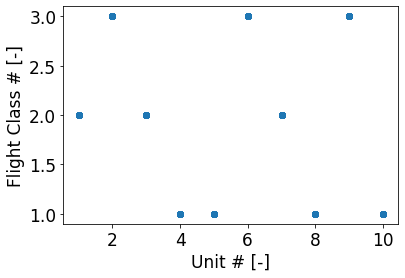

In [15]:
labelsize = 17
plt.plot(df_A.unit, df_A.Fc, 'o')
plt.tick_params(axis='x', labelsize=labelsize )
plt.tick_params(axis='y', labelsize=labelsize )
plt.xlabel('Unit # [-]', fontsize=labelsize)
plt.ylabel('Flight Class # [-]', fontsize=labelsize )

### End Of Failure ($t_{\text{EOF}}$)

The run to failure operation take a different number of cycles for each unit. Below we report the total number of cycles for each unit.

In [16]:
for i in np.unique(df_A['unit']):
    print('Unit: ' + str(i) + ' - Number of flight cyles (t_{EOF}): ', len(np.unique(df_A.loc[df_A['unit'] == i, 'cycle'])))
    #np.unique(df_A.loc[df_A['unit'] == i, 'cycle'])

Unit: 1.0 - Number of flight cyles (t_{EOF}):  78
Unit: 2.0 - Number of flight cyles (t_{EOF}):  78
Unit: 3.0 - Number of flight cyles (t_{EOF}):  65
Unit: 4.0 - Number of flight cyles (t_{EOF}):  87
Unit: 5.0 - Number of flight cyles (t_{EOF}):  99
Unit: 6.0 - Number of flight cyles (t_{EOF}):  68
Unit: 7.0 - Number of flight cyles (t_{EOF}):  80
Unit: 8.0 - Number of flight cyles (t_{EOF}):  91
Unit: 9.0 - Number of flight cyles (t_{EOF}):  69
Unit: 10.0 - Number of flight cyles (t_{EOF}):  82


## Operative Conditions ($w$)

DASHlink- Flight Data For Tail 687.(2012). Retrieved on 2019-01-29 from https://c3.nasa.gov/dashlink/

In [17]:
df_W = DataFrame(data=W, columns=W_var)
df_W['unit'] = df_A['unit'].values

In [18]:
def plot_df_single_color(data, variables, labels, size=12, labelsize=17, name=None):
    """
    plots every variable in the dataframe against the time
    """
    plt.clf()        
    input_dim = len(variables)
    cols = min(np.floor(input_dim**0.5).astype(int),4)
    rows = (np.ceil(input_dim / cols)).astype(int)
    gs   = gridspec.GridSpec(rows, cols)    
    fig  = plt.figure(figsize=(size,max(size,rows*2))) 
    
    for n in range(input_dim):
        ax = fig.add_subplot(gs[n])
        ax.plot(data[variables[n]], marker='.', markerfacecolor='none', alpha = 0.7)
        ax.tick_params(axis='x', labelsize=labelsize)
        ax.tick_params(axis='y', labelsize=labelsize)
        plt.ylabel(labels[n], fontsize=labelsize)
        plt.xlabel('Time [s]', fontsize=labelsize)
    plt.tight_layout()
    if name is not None:
        plt.savefig(name, format='png', dpi=300)   
    plt.show()
    plt.close()

In [3]:
def plot_df_color_per_unit(data, variables, labels, size=7, labelsize=17, option='Time', name=None):
    """
    plots the data giving each unit a different color, if you are plotting by unit , this is useful
    
    """
    plt.clf()        
    input_dim = len(variables)
    cols = min(np.floor(input_dim**0.5).astype(int),4)
    rows = (np.ceil(input_dim / cols)).astype(int)
    gs   = gridspec.GridSpec(rows, cols)
    leg  = []
    fig  = plt.figure(figsize=(size,max(size,rows*2)))
    color_dic_unit = {'Unit 1': 'C0', 'Unit 2': 'C1', 'Unit 3': 'C2', 'Unit 4': 'C3', 'Unit 5': 'C4', 'Unit 6': 'C5',
                      'Unit 7': 'C6', 'Unit 8': 'C7', 'Unit 9': 'C8', 'Unit 10': 'C9', 'Unit 11': 'C10',
                      'Unit 12': 'C11', 'Unit 13': 'C12', 'Unit 14': 'C13', 'Unit 15': 'C14', 'Unit 16': 'C15',
                      'Unit 17': 'C16', 'Unit 18': 'C17', 'Unit 19': 'C18', 'Unit 20': 'C19'} 
    
    unit_sel  = np.unique(data['unit'])
    for n in range(input_dim):
        ax = fig.add_subplot(gs[n])
        for j in unit_sel:
            data_unit = data.loc[data['unit'] == j]
            if option=='cycle':
                time_s = data.loc[data['unit'] == j, 'cycle']
                label_x = 'Time [cycle]'
            else:
                time_s = np.arange(len(data_unit))
                label_x = 'Time [s]'
            ax.plot(time_s, data_unit[variables[n]], '-o', color=color_dic_unit['Unit ' + str(int(j))],
                    alpha=0.7, markersize=5)
            ax.tick_params(axis='x', labelsize=labelsize)
            ax.tick_params(axis='y', labelsize=labelsize)
            leg.append('Unit '+str(int(j)))
        plt.ylabel(labels[n], fontsize=labelsize)    
        plt.xlabel(label_x, fontsize=labelsize)
        ax.get_xaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
        if n==0:
            ax.get_yaxis().set_major_formatter(
            matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    plt.legend(leg, loc='best', fontsize=labelsize-2) #lower left
    plt.tight_layout()
    if name is not None:
        plt.savefig(name, format='png', dpi=300)   
    plt.show()
    plt.close()

### Flight Traces

<Figure size 432x288 with 0 Axes>

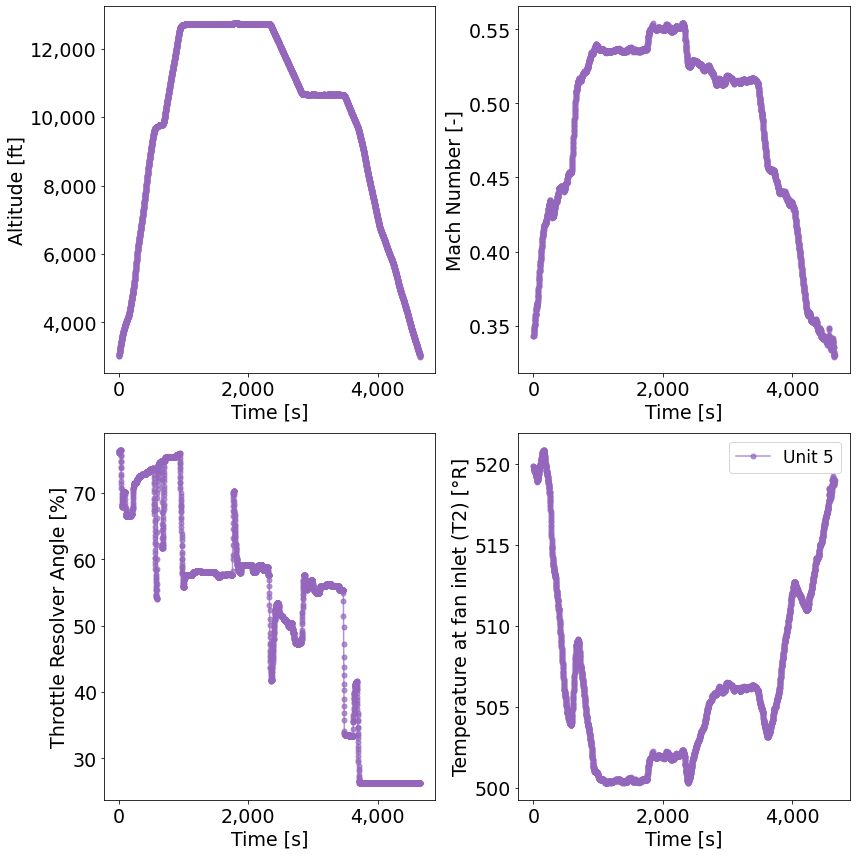

In [20]:
df_W_u = df_W.loc[(df_A.unit == 5) & (df_A.cycle == 1)]
df_W_u.reset_index(inplace=True, drop=True)
labels = ['Altitude [ft]', 'Mach Number [-]', 'Throttle Resolver Angle [%]', 'Temperature at fan inlet (T2) [°R]']
plot_df_color_per_unit(df_W_u, W_var , labels, size=12, labelsize=19, name='flight_profile_DS02.png')

### Flight envelope

Text(0, 0.5, 'Flight Altitude - [ft]')

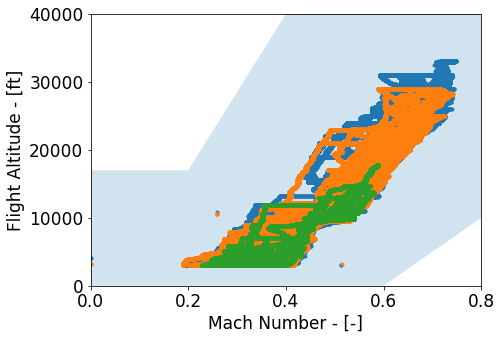

In [21]:
labelsize = 17
x = np.array([0.0, 0.2, 0.4, 0.6, 0.8])
u = np.array([1.7, 1.7, 4.0, 4.0, 4.0])*10000
l = np.array([0.0, 0.0, 0.0, 0.0, 1.0])*10000
plt.figure(figsize=(7,5)) 
plt.fill_between(x, l, u, alpha=0.2)
plt.plot(df_W.loc[df_A['Fc'] == 3, 'Mach'], df_W.loc[df_A['Fc'] == 3, 'alt'], '.', alpha=0.9)
plt.plot(df_W.loc[df_A['Fc'] == 2, 'Mach'], df_W.loc[df_A['Fc'] == 2, 'alt'], '.', alpha=0.9)
plt.plot(df_W.loc[df_A['Fc'] == 1, 'Mach'], df_W.loc[df_A['Fc'] == 1, 'alt'], '.', alpha=0.9)
plt.tick_params(axis='x', labelsize=labelsize )
plt.tick_params(axis='y', labelsize=labelsize )
plt.xlim((0.0, 0.8))
plt.ylim((0, 40000)) 
plt.xlabel('Mach Number - [-]', fontsize=labelsize)
plt.ylabel('Flight Altitude - [ft]', fontsize=labelsize)

### Histogram of Flight Conditions

In [22]:
def plot_kde(leg, variables, labels, size, units, df_W, df_A, labelsize=17, name=None):
    """
    """
    plt.clf()
       
    input_dim = len(variables)
    cols = min(np.floor(input_dim**0.5).astype(int),4)
    rows = (np.ceil(input_dim / cols)).astype(int)
    gs = gridspec.GridSpec(rows, cols)
    
    color_dic_unit = {'Unit 1': 'C0', 'Unit 2': 'C1', 'Unit 3': 'C2', 'Unit 4': 'C3', 'Unit 5': 'C4', 'Unit 6': 'C5',
                      'Unit 7': 'C6', 'Unit 8': 'C7', 'Unit 9': 'C8', 'Unit 10': 'C9', 'Unit 11': 'C10',
                      'Unit 12': 'C11', 'Unit 13': 'C12', 'Unit 14': 'C13', 'Unit 15': 'C14', 'Unit 16': 'C15',
                      'Unit 17': 'C16', 'Unit 18': 'C17', 'Unit 19': 'C18', 'Unit 20': 'C19'} 
    
    fig = plt.figure(figsize=(size,max(size,rows*2)))       

    for n in range(input_dim):
        ax = fig.add_subplot(gs[n])
        for k, elem in enumerate(units):
            sns.kdeplot(df_W.loc[df_A['unit'] == elem, variables[n]],
                        color=color_dic_unit[leg[k]], shade=True, gridsize=100)  
            ax.tick_params(axis='x', labelsize=labelsize)
            ax.tick_params(axis='y', labelsize=labelsize)
        
        ax.get_xaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))        
        plt.xlabel(labels[n], fontsize=labelsize)
        plt.ylabel('Density [-]', fontsize=labelsize)
        if n==0:
            plt.legend(leg, fontsize=labelsize-4, loc=0)
        else:
            plt.legend(leg, fontsize=labelsize-4, loc=2)
    plt.tight_layout()
    if name is not None:
        plt.savefig(name, format='png', dpi=300)    
    plt.show()
    plt.close()

<Figure size 432x288 with 0 Axes>

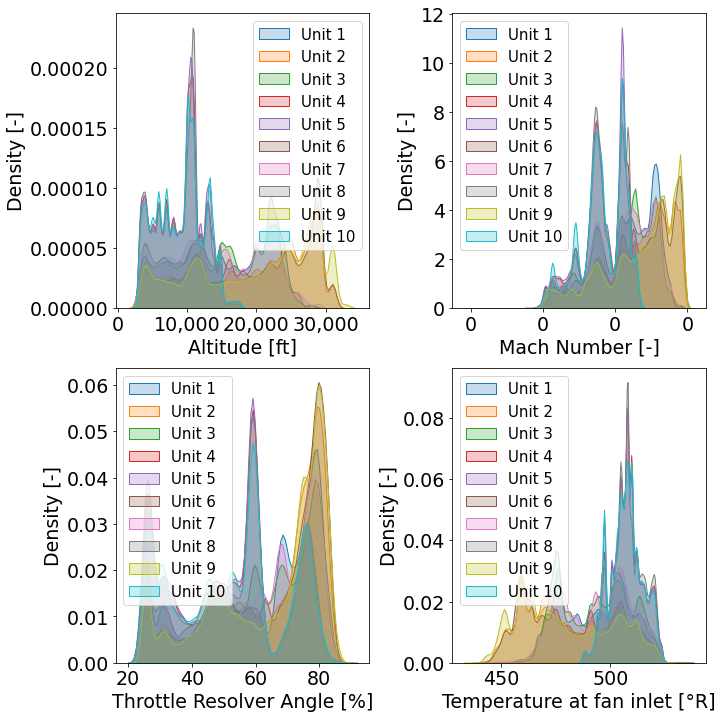

In [23]:
variables = ['alt', 'Mach', 'TRA', 'T2']
labels = ['Altitude [ft]', 'Mach Number [-]', 'Throttle Resolver Angle [%]', 'Temperature at fan inlet [°R]']
size = 10

units = list(np.unique(df_A['unit']))
leg = ['Unit ' + str(int(u)) for u in units]

plot_kde(leg, variables, labels, size, units, df_W, df_A, labelsize=19, name='kde_DS02.png')

## Degradation ($\theta$)

In [24]:
df_T = DataFrame(data=T, columns=T_var) 
df_T['unit'] = df_A['unit'].values
df_T['cycle'] = df_A['cycle'].values
df_Ts = df_T.drop_duplicates()
df_Ts.describe()

,fan_eff_mod,fan_flow_mod,LPC_eff_mod,LPC_flow_mod,HPC_eff_mod,HPC_flow_mod,HPT_eff_mod,HPT_flow_mod,LPT_eff_mod,LPT_flow_mod,unit,cycle
count,797.0,797.0,797.000000,797.000000,797.000000,797.000000,797.0,797.0,797.0,797.0,797.000000,797.000000
mean,0.0,0.0,-0.005514,-0.006444,-0.003694,-0.005674,0.0,0.0,0.0,0.0,5.531995,40.997491
std,0.0,0.0,0.011204,0.013952,0.004469,0.009312,0.0,0.0,0.0,0.0,2.842701,24.133735
min,0.0,0.0,-0.134348,-0.155209,-0.023801,-0.070658,0.0,0.0,0.0,0.0,1.000000,1.000000
25%,0.0,0.0,-0.005237,-0.005695,-0.004683,-0.005974,0.0,0.0,0.0,0.0,3.000000,20.000000
50%,0.0,0.0,-0.001867,-0.001968,-0.001668,-0.002021,0.0,0.0,0.0,0.0,5.000000,40.000000
75%,0.0,0.0,-0.001026,-0.000973,-0.000976,-0.001102,0.0,0.0,0.0,0.0,8.000000,60.000000
max,0.0,0.0,-0.000079,0.000094,0.000067,-0.000081,0.0,0.0,0.0,0.0,10.000000,99.000000


In [25]:
df_Ts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 797 entries, 0 to 6773979
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   fan_eff_mod   797 non-null    float64
 1   fan_flow_mod  797 non-null    float64
 2   LPC_eff_mod   797 non-null    float64
 3   LPC_flow_mod  797 non-null    float64
 4   HPC_eff_mod   797 non-null    float64
 5   HPC_flow_mod  797 non-null    float64
 6   HPT_eff_mod   797 non-null    float64
 7   HPT_flow_mod  797 non-null    float64
 8   LPT_eff_mod   797 non-null    float64
 9   LPT_flow_mod  797 non-null    float64
 10  unit          797 non-null    float64
 11  cycle         797 non-null    float64
dtypes: float64(12)
memory usage: 80.9 KB


!pip uninstall -y plotly
!pip install --upgrade plotly

In [26]:
df_Ts.head()

,fan_eff_mod,fan_flow_mod,LPC_eff_mod,LPC_flow_mod,HPC_eff_mod,HPC_flow_mod,HPT_eff_mod,HPT_flow_mod,LPT_eff_mod,LPT_flow_mod,unit,cycle
0,0.0,0.0,-0.000902,-0.000967,-0.000261,-0.000613,0.0,0.0,0.0,0.0,1.0,1.0
10537,0.0,0.0,-0.000854,-0.000984,0.000067,-0.000799,0.0,0.0,0.0,0.0,1.0,2.0
19321,0.0,0.0,-0.000676,-0.000852,-0.000124,-0.000613,0.0,0.0,0.0,0.0,1.0,3.0
28915,0.0,0.0,-0.000919,-0.001027,0.000009,-0.000677,0.0,0.0,0.0,0.0,1.0,4.0
40272,0.0,0.0,-0.000994,-0.000942,-0.000267,-0.000862,0.0,0.0,0.0,0.0,1.0,5.0


<Figure size 432x288 with 0 Axes>

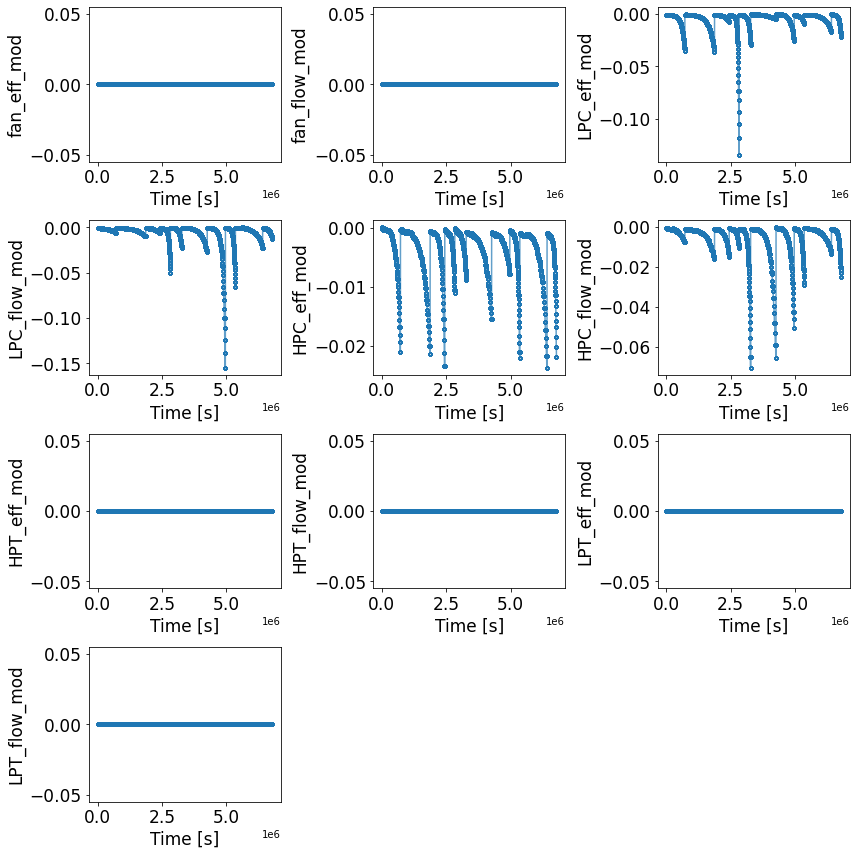

In [27]:
labels = T_var
plot_df_single_color(df_T, T_var , labels)

<Figure size 432x288 with 0 Axes>

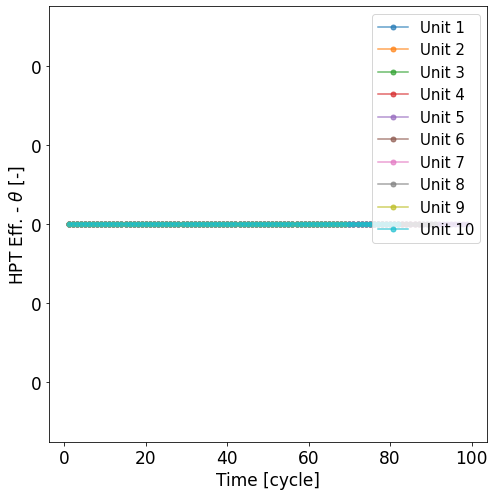

In [28]:
plot_df_color_per_unit(df_Ts, ['HPT_eff_mod'], [r'HPT Eff. - $\theta$ [-]'], size=7,  option='cycle')

## Sensor readings ($X_s$)

In [29]:
df_X_s = DataFrame(data=X_s, columns=X_s_var) 

###  Single Unit 

<Figure size 432x288 with 0 Axes>

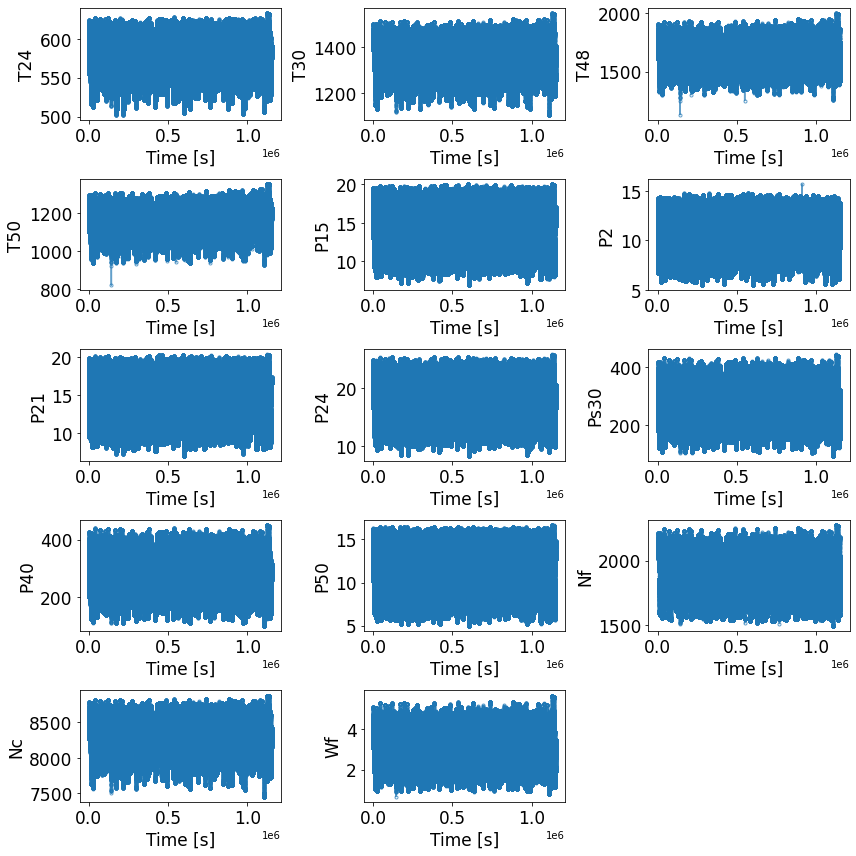

In [30]:
df_X_s_u = df_X_s.loc[df_A.unit == 2]
df_X_s_u.reset_index(inplace=True, drop=True)
labels = X_s_var
plot_df_single_color(df_X_s_u, X_s_var, labels)

###  Single Flight Cycle

<Figure size 432x288 with 0 Axes>

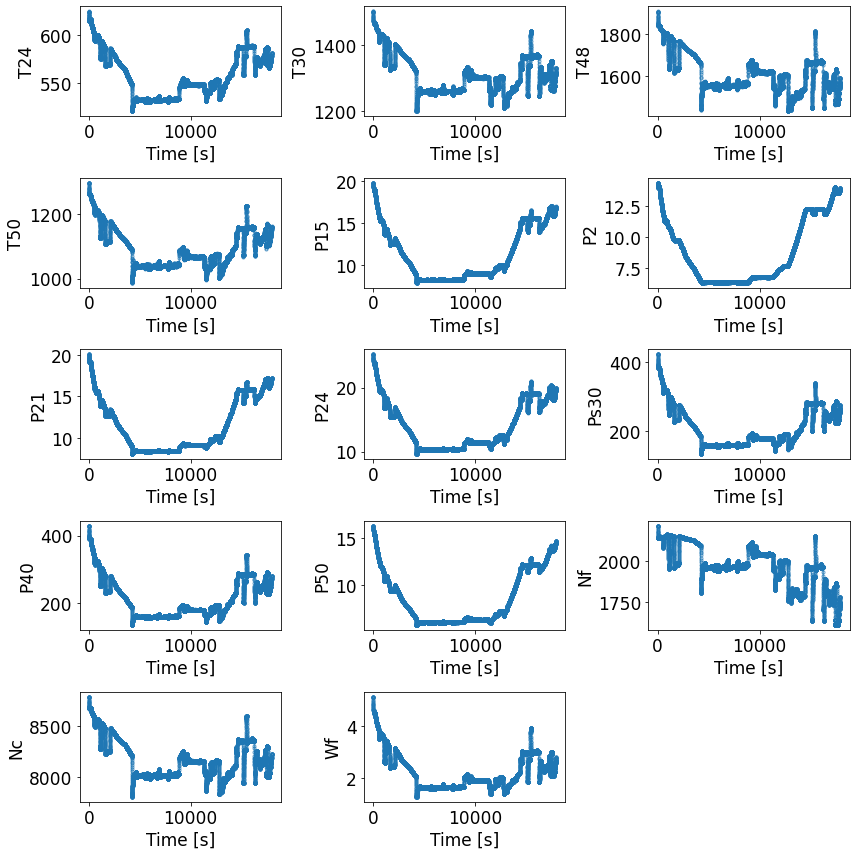

In [31]:
df_X_s_u_c = df_X_s.loc[(df_A.unit == 2) & (df_A.cycle == 8)]
df_X_s_u_c.reset_index(inplace=True, drop=True)
plot_df_single_color(df_X_s_u_c, X_s_var, X_s_var)

## Virtual Sensors ($X_v$)

In [32]:
df_X_v = DataFrame(data=X_v, columns=X_v_var) 

<Figure size 432x288 with 0 Axes>

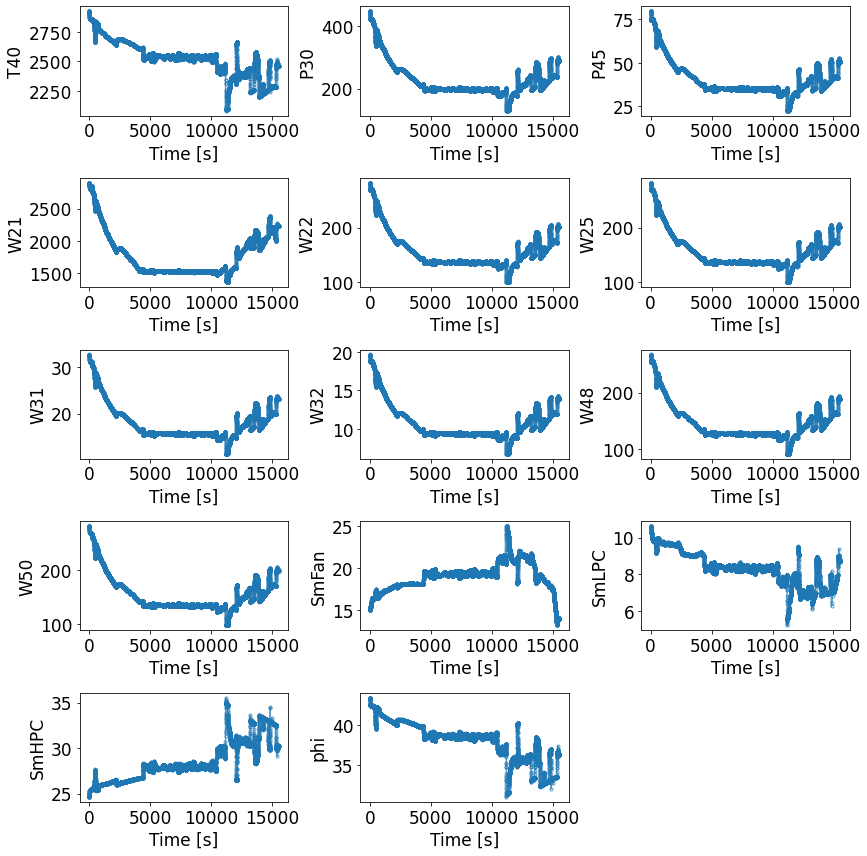

In [33]:
df_X_v_u_c = df_X_v.loc[(df_A.unit == 2) & (df_A.cycle == 1)]
df_X_v_u_c.reset_index(inplace=True, drop=True)
plot_df_single_color(df_X_v_u_c, X_v_var, X_v_var)

## Health state ($h_s$)

<Figure size 432x288 with 0 Axes>

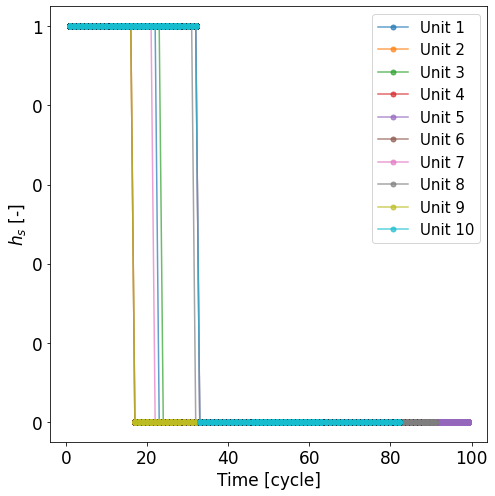

In [34]:
plot_df_color_per_unit(df_A, ['hs'], [r'$h_s$ [-]'], option='cycle')

In [35]:
df_Y = DataFrame(data=Y) 

In [36]:
len(df_Y)

6779656

# Data problem, 

### Y = Estimate, A=Actual (cycle at hs=0)

Machine Learning problem is regression to estimate the value of Y.


I need to estimate Y 

what do i need to estimate Y 

Y = W+Xs


In [37]:
len(df_A)

6779656

In [38]:
len(df_Y)

6779656

In [39]:
df_A.head()

,unit,cycle,Fc,hs
0,1.0,1.0,2.0,1.0
1,1.0,1.0,2.0,1.0
2,1.0,1.0,2.0,1.0
3,1.0,1.0,2.0,1.0
4,1.0,1.0,2.0,1.0


In [40]:
df_A[df_A['hs']==0.0].groupby('unit').max()

,cycle,Fc,hs
unit,,,
1.0,78.0,2.0,0.0
2.0,78.0,3.0,0.0
3.0,65.0,2.0,0.0
4.0,87.0,1.0,0.0
5.0,99.0,1.0,0.0
6.0,68.0,3.0,0.0
7.0,80.0,2.0,0.0
8.0,91.0,1.0,0.0
9.0,69.0,3.0,0.0


In [41]:

df_A_dev=DataFrame(data=A_dev, columns=A_var)
df_X_s_dev=DataFrame(data=X_s_dev, columns=X_s_var)
df_T_dev=DataFrame(data=T_dev, columns=T_var)
df_Y_dev=DataFrame(data=Y_dev)

In [42]:
df_W_dev=DataFrame(data=W_dev, columns=W_var)

In [43]:
df_Y_dev.columns=["Y_hat"]

In [44]:
df_dev=pd.concat([df_Y_dev,df_W_dev,df_X_s_dev,df_A_dev,df_T_dev ], axis=1)

In [45]:
df_dev_comp=df_dev[['Y_hat','cycle','hs','unit']]

In [46]:
df_dev_comp_unit1=df_dev_comp[df_dev_comp['unit']==2.0]

### Big Picture 

At a high level, as the cycles increase, the Remaining Usable Life (RUL) decreases as can be seen from the example below plotted with just Unit1. whil this is linear the degradation is not. 

Text(0, 0.5, 'Cycle')

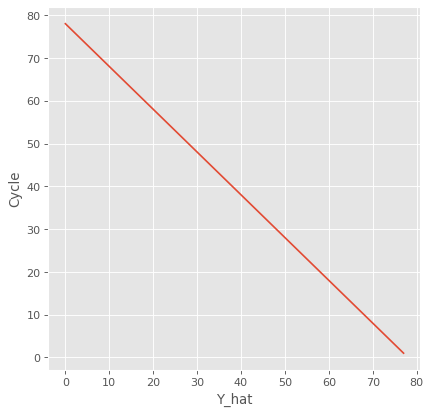

In [47]:
plt.style.use('ggplot')
plt.figure(figsize=(6, 6), dpi=80)
plt.plot(df_dev_comp_unit1['Y_hat'],df_dev_comp_unit1['cycle'])
plt.xlabel('Y_hat')
plt.ylabel("Cycle")

## Let's Create the dataset as defined in the paper D(W, Xs, Y)

In [48]:
df_mod=pd.concat([df_Y_dev,df_W_dev,df_X_s_dev], axis=1)

In [49]:
df_mod.rename(columns={"Y_hat":'Y'}, inplace=True)

In [50]:
df_mod.head()

,Y,alt,Mach,TRA,T2,T24,T30,T48,T50,P15,P2,P21,P24,Ps30,P40,P50,Nf,Nc,Wf
0,77,3002.0,0.370377,81.122467,521.900827,628.041091,1511.541861,1927.043281,1306.041150,20.030745,14.445617,20.335782,25.648097,433.567253,440.308518,16.506580,2240.817096,8822.877846,5.280846
1,77,3010.0,0.370818,81.122467,521.904702,628.029107,1511.487263,1927.057002,1306.054316,20.028087,14.444604,20.333083,25.644403,433.481447,440.220073,16.502836,2240.682993,8822.661108,5.280108
2,77,3017.0,0.371259,81.122467,521.912580,628.036334,1511.476515,1927.009256,1305.986628,20.027190,14.444141,20.332173,25.643612,433.441995,440.180543,16.499506,2240.711266,8822.630498,5.279434
3,77,3030.0,0.372078,81.122467,521.926210,628.048399,1511.469365,1926.968895,1305.904807,20.025674,14.443352,20.330633,25.642218,433.385864,440.124037,16.494377,2240.760182,8822.608655,5.278578
4,77,3038.0,0.372519,81.122467,521.930527,628.051452,1511.428821,1926.871474,1305.799090,20.023900,14.442366,20.328833,25.640444,433.309866,440.047709,16.489573,2240.761587,8822.482371,5.277352


### Quick Correlation and Data Analysis
we can look at a quick correlation and data analysis to see how the target variable moves with rest of the data how closely related are each of the variables with each other

we will use a library called Sweetviz for this 

In [51]:
df_mod.to_csv('nasa_train_data.csv', index=False)

In [52]:
train_data, validation_data= np.split(df_mod.sample(frac=1, random_state=1729), [int(0.8 * len(df_mod))])

In [53]:
len(train_data)


3405767

In [54]:
len(validation_data)

851442

In [55]:
train_data.to_csv('train.csv', index=False, header=False)
validation_data.to_csv('validation.csv', index=False)


In [56]:
!aws s3 cp train.csv s3://{input_bucket}/input/train/train.csv
!aws s3 cp validation.csv s3://{input_bucket}/input/validation/validation.csv

upload: ./train.csv to s3://agm-nasa-bucket/input/train/train.csv     
upload: ./validation.csv to s3://agm-nasa-bucket/input/validation/validation.csv


## Let's start with the simplest algorithm in SageMaker - XGBoost (Regressor)

### Pandas profiling for a bigger notebook

In [57]:
# Define IAM role
import boto3
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sagemaker
from sagemaker import get_execution_role
from sagemaker.inputs import TrainingInput
from sagemaker.serializers import CSVSerializer


In [58]:
import boto3
import sagemaker
from sagemaker.xgboost.estimator import XGBoost
from sagemaker.session import Session
from sagemaker.inputs import TrainingInput
from sagemaker.debugger import Rule, rule_configs

rules=[
    Rule.sagemaker(rule_configs.create_xgboost_report())
]


# initialize hyperparameters
hyperparameters = {
        "max_depth":"8",
        "eta":"0.3",
        "gamma":"4",
        "min_child_weight":"6",
        "subsample":"0.7",
        "verbosity":"1",
        "objective":"reg:squarederror",
        "num_round":"150"}

In [59]:
# set an output path where the trained model will be saved
bucket = sagemaker.Session().default_bucket()
prefix = 'Xgboost-NASA'
output_path = 's3://{}/{}/{}/output'.format(bucket, prefix, 'nasa-xgb-framework')

In [60]:
#input_bucket='mobazhar-engine-flight-data'
prefix='input'
region='us-east-1'

In [61]:
xgboost_container = sagemaker.image_uris.retrieve("xgboost", region, "1.2-1")

# construct a SageMaker estimator that calls the xgboost-container
estimator = sagemaker.estimator.Estimator(image_uri=xgboost_container, 
                                          hyperparameters=hyperparameters,
                                          role=sagemaker.get_execution_role(),
                                          instance_count=1, 
                                          instance_type='ml.m5.4xlarge', 
                                          volume_size=50, # 50 GB 
                                          output_path=output_path,
                                          rules=rules)

In [62]:
content_type = "csv"
train_input = TrainingInput(s3_data="s3://{}/{}/{}/".format(input_bucket, prefix, 'train'), content_type=content_type)
validation_input = TrainingInput(s3_data="s3://{}/{}/{}/".format(input_bucket, prefix, 'validation'), content_type=content_type)

# execute the XGBoost training job
estimator.fit({'train': train_input, 'validation': validation_input})

2022-04-13 21:46:08 Starting - Starting the training job...
2022-04-13 21:46:31 Starting - Preparing the instances for trainingCreateXgboostReport: InProgress
ProfilerReport-1649886367: InProgress
......
2022-04-13 21:47:38 Downloading - Downloading input data......
2022-04-13 21:48:32 Training - Downloading the training image...
2022-04-13 21:49:03 Training - Training image download completed. Training in progress..[2022-04-13 21:49:03.045 ip-10-0-103-81.ec2.internal:1 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None
INFO:sagemaker-containers:Imported framework sagemaker_xgboost_container.training
INFO:sagemaker-containers:Failed to parse hyperparameter objective value reg:squarederror to Json.
Returning the value itself
INFO:sagemaker-containers:No GPUs detected (normal if no gpus installed)
INFO:sagemaker_xgboost_container.training:Running XGBoost Sagemaker in algorithm mode
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
IN

In [63]:
import os
import s3fs
s3 = s3fs.S3FileSystem(anon=False)
from IPython.display import FileLink, FileLinks

#get name of profiler report
profiler_report_name = [rule["RuleConfigurationName"] 
                        for rule in estimator.latest_training_job.rule_job_summary() 
                        if "Profiler" in rule["RuleConfigurationName"]][0]

xgb_profile_job_name = [rule["RuleEvaluationJobArn"].split("/")[-1] 
                        for rule in estimator.latest_training_job.rule_job_summary() 
                        if "CreateXgboostReport" in rule["RuleConfigurationName"]][0]

base_output_path = os.path.dirname(estimator.latest_job_debugger_artifacts_path())
rule_output_path = os.path.join(base_output_path, "rule-output/")
xgb_report_path = os.path.join(rule_output_path, "CreateXgboostReport")
profile_report_path = os.path.join(rule_output_path, profiler_report_name)

while True:
    
    xgb_job_info = sagemaker.Session().sagemaker_client.describe_processing_job(ProcessingJobName=xgb_profile_job_name)

    if xgb_job_info["ProcessingJobStatus"] == "Completed":
        break
    else:
        print(f"Job Status: {xgb_job_info['ProcessingJobStatus']}")
        time.sleep(30)

s3.download(xgb_report_path, "reports/xgb/", recursive=True)
s3.download(profile_report_path, "reports/profiler/", recursive=True)
display("Click link below to view the profiler report", FileLink("reports/profiler/profiler-output/profiler-report.html"))
display("Click link below to view the XGBoost Training report", FileLink("reports/xgb/xgboost_report.html"))

'Click link below to view the profiler report'

/home/ec2-user/SageMaker/reports/profiler/profiler-output/profiler-report.html

'Click link below to view the XGBoost Training report'

/home/ec2-user/SageMaker/reports/xgb/xgboost_report.html

#### Test Dataset

In [64]:
df_X_s_test=DataFrame(data=X_s_test, columns=X_s_var)
df_W_test=DataFrame(data=W_test, columns=W_var)
df_Y_test=DataFrame(data=Y_test)
df_Y_test.columns=['Y']
test_df=pd.concat([df_W_test,df_X_s_test], axis=1)

In [65]:
df_W_test.columns

Index(['alt', 'Mach', 'TRA', 'T2'], dtype='object')

In [66]:
test_df.head()

,alt,Mach,TRA,T2,T24,T30,T48,T50,P15,P2,P21,P24,Ps30,P40,P50,Nf,Nc,Wf
0,3004.0,0.403452,74.530716,524.493050,624.726424,1491.065667,1884.038156,1284.332840,19.961011,14.702238,20.264985,25.291200,414.409090,421.109313,16.239325,2185.930575,8755.292697,4.932361
1,3015.0,0.403578,74.530716,524.464080,624.690901,1490.977812,1883.910694,1284.229815,19.954448,14.697482,20.258323,25.282976,414.264294,420.962415,16.233105,2185.868473,8755.015975,4.930384
2,3027.0,0.404271,74.530716,524.476156,624.694268,1490.946675,1883.880158,1284.174359,19.952222,14.696453,20.256063,25.280267,414.185398,420.882115,16.227871,2185.840937,8754.901842,4.929428
3,3038.0,0.403515,74.530716,524.372840,624.593637,1490.762149,1883.537284,1283.928386,19.937199,14.684287,20.240811,25.261729,413.909241,420.603123,16.218064,2185.781162,8754.367043,4.925238
4,3050.0,0.403578,74.530716,524.335376,624.536073,1490.643955,1883.472253,1283.907800,19.928668,14.678530,20.232150,25.250229,413.730517,420.420111,16.212076,2185.594432,8753.958687,4.923280


In [67]:
test_df.to_csv('test_data.csv', index=False, header=False)

In [68]:
!aws s3 cp test_data.csv s3://{input_bucket}/input/test.csv

upload: ./test_data.csv to s3://agm-nasa-bucket/input/test.csv      


In [69]:
test_data_set=f's3://{input_bucket}/input/test.csv'

### Sagemaker Batch Inference

This problem benefits from batch inference as there are a lot of records in the test dataset and we want to be able to get predictions for them all. 

**Note On Real Time Inference**: 

While we can also do this real time for use cases where that is justified like a bunch of sensors streaming data to the cockpit and we run a machine learning model at the edge to predict something. 

### To use a model trained with SageMaker XGBoost in open source XGBoost

**Use the following Python code:**
```python
import pickle as pkl 
import tarfile

t = tarfile.open('model.tar.gz', 'r:gz')
t.extractall()

model = pkl.load(open(model_file_path, 'rb'))

##### prediction with test data
pred = model.predict(dtest)
```

#### Attach back to the completed training job 

In [70]:
latest_training_job_name = estimator.latest_training_job.job_name

In [71]:
estimator=sagemaker.estimator.Estimator.attach(training_job_name=latest_training_job_name, sagemaker_session=None)


2022-04-13 21:58:35 Starting - Preparing the instances for training
2022-04-13 21:58:35 Downloading - Downloading input data
2022-04-13 21:58:35 Training - Training image download completed. Training in progress.
2022-04-13 21:58:35 Uploading - Uploading generated training model
2022-04-13 21:58:35 Completed - Training job completed


In [72]:
batch_output=f"s3://{input_bucket}/batch_inference"

In [73]:
transformer=estimator.transformer(instance_count=1, instance_type="ml.m5.4xlarge",output_path=batch_output,assemble_with="Line",accept="text/csv")

In [74]:
transformer.transform(data=test_data_set,join_source="Input",input_filter="$", data_type='S3Prefix', content_type='text/csv',split_type='Line')
transformer.wait()

..............................[2022-04-13:22:04:37:INFO] No GPUs detected (normal if no gpus installed)
[2022-04-13:22:04:37:INFO] No GPUs detected (normal if no gpus installed)
[2022-04-13:22:04:37:INFO] nginx config: 
worker_processes auto;
daemon off;
pid /tmp/nginx.pid;
error_log  /dev/stderr;
worker_rlimit_nofile 4096;
events {
  worker_connections 2048;
}
http {
  include /etc/nginx/mime.types;
  default_type application/octet-stream;
  access_log /dev/stdout combined;
  upstream gunicorn {
    server unix:/tmp/gunicorn.sock;
  }
  server {
    listen 8080 deferred;
    client_max_body_size 0;
    keepalive_timeout 3;
    location ~ ^/(ping|invocations|execution-parameters) {
      proxy_set_header X-Forwarded-For $proxy_add_x_forwarded_for;
      proxy_set_header Host $http_host;
      proxy_redirect off;
      proxy_read_timeout 60s;
      proxy_pass http://gunicorn;
    }
    location / {
      return 404 "{}";
    }
  }
}
[2022-04-13 22:04:37 +0000] [42] [INFO] Starting gunic

### Let's compare predictions vs Actual 

In [75]:
!aws s3 cp s3://{input_bucket}/batch_inference/test.csv.out .

download: s3://agm-nasa-bucket/batch_inference/test.csv.out to ./test.csv.out


In [76]:
import pandas as pd

In [77]:
columns=['alt','Mach','TRA','T2','T24','T30','T48','T50','P15','P2','P21','P24','Ps30','P40','P50','Nf','Nc','Wf','Y_pred']

In [78]:
df_pred=pd.read_csv('test.csv.out', names=columns)

In [79]:
df_pred.head()

,alt,Mach,TRA,T2,T24,T30,T48,T50,P15,P2,P21,P24,Ps30,P40,P50,Nf,Nc,Wf,Y_pred
0,3004.0,0.403452,74.530716,524.493050,624.726424,1491.065667,1884.038156,1284.332840,19.961011,14.702238,20.264985,25.291200,414.409090,421.109313,16.239325,2185.930575,8755.292697,4.932361,46.513588
1,3015.0,0.403578,74.530716,524.464080,624.690901,1490.977812,1883.910694,1284.229815,19.954448,14.697482,20.258323,25.282976,414.264294,420.962415,16.233105,2185.868473,8755.015975,4.930384,44.218063
2,3027.0,0.404271,74.530716,524.476156,624.694268,1490.946675,1883.880158,1284.174359,19.952222,14.696453,20.256063,25.280267,414.185398,420.882115,16.227871,2185.840937,8754.901842,4.929428,44.218063
3,3038.0,0.403515,74.530716,524.372840,624.593637,1490.762149,1883.537284,1283.928386,19.937199,14.684287,20.240811,25.261729,413.909241,420.603123,16.218064,2185.781162,8754.367043,4.925238,44.218063
4,3050.0,0.403578,74.530716,524.335376,624.536073,1490.643955,1883.472253,1283.907800,19.928668,14.678530,20.232150,25.250229,413.730517,420.420111,16.212076,2185.594432,8753.958687,4.923280,48.049370


In [80]:
df_pred['Y_act']=df_Y_test.values

In [81]:
df_pred.head()

,alt,Mach,TRA,T2,T24,T30,T48,T50,P15,P2,P21,P24,Ps30,P40,P50,Nf,Nc,Wf,Y_pred,Y_act
0,3004.0,0.403452,74.530716,524.493050,624.726424,1491.065667,1884.038156,1284.332840,19.961011,14.702238,20.264985,25.291200,414.409090,421.109313,16.239325,2185.930575,8755.292697,4.932361,46.513588,79
1,3015.0,0.403578,74.530716,524.464080,624.690901,1490.977812,1883.910694,1284.229815,19.954448,14.697482,20.258323,25.282976,414.264294,420.962415,16.233105,2185.868473,8755.015975,4.930384,44.218063,79
2,3027.0,0.404271,74.530716,524.476156,624.694268,1490.946675,1883.880158,1284.174359,19.952222,14.696453,20.256063,25.280267,414.185398,420.882115,16.227871,2185.840937,8754.901842,4.929428,44.218063,79
3,3038.0,0.403515,74.530716,524.372840,624.593637,1490.762149,1883.537284,1283.928386,19.937199,14.684287,20.240811,25.261729,413.909241,420.603123,16.218064,2185.781162,8754.367043,4.925238,44.218063,79
4,3050.0,0.403578,74.530716,524.335376,624.536073,1490.643955,1883.472253,1283.907800,19.928668,14.678530,20.232150,25.250229,413.730517,420.420111,16.212076,2185.594432,8753.958687,4.923280,48.049370,79


In [82]:
# let's look at ranges
Y1=df_pred['Y_pred']
Y2=df_pred['Y_act']

#### Regression Metrics

For Regression, metrics such as R2 and Mean Absolute Error tell us on avergae how well the model is performing across all predictions, While this is great when your value ranges are in a narrow range, for larger ranges, these don't tell the whole story, It is always good to put these metrics into perspective in terms of more granular performance. Here we will first calculate these metrics but we will also plot True RUL vs Predicted RUL for all values to see how they fit in.

In [83]:
from sklearn.metrics import r2_score,mean_absolute_error
print(f"R2 Score: {r2_score(Y2, Y1)}")
print(f"Mean Absolute Score: {mean_absolute_error(Y2, Y1)}")


R2 Score: 0.7531549098124763
Mean Absolute Score: 8.776337650805356


### Plot True RUL VS Predicted RUL

Loading BokehJS ...

Text(0, 0.5, 'Predicted RUL')

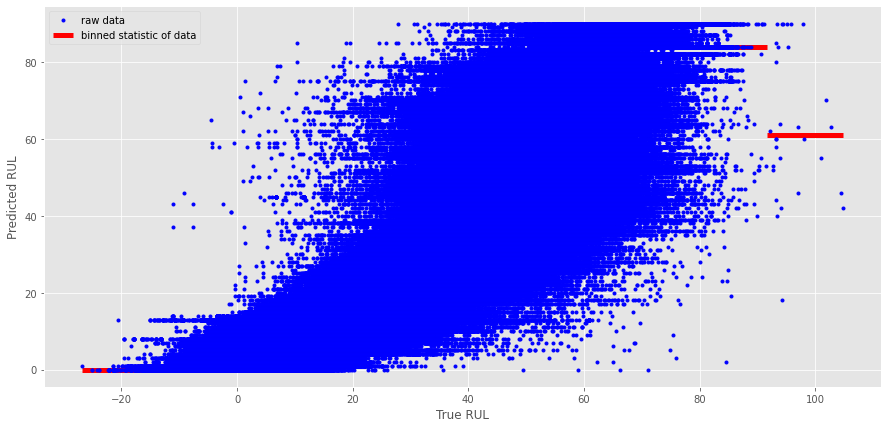

In [84]:
from bokeh.io import output_notebook, show
from bokeh.layouts import gridplot
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure
output_notebook()

from scipy import stats
from bokeh.models.tickers import SingleIntervalTicker
import random

statistics, bin_edge, bin_num = stats.binned_statistic(Y1, Y2, statistic='median', bins=10)
plt.figure(figsize=(15,7))
plt.plot(Y1, Y2, 'b.', label='raw data')
plt.hlines(statistics, bin_edge[:-1], bin_edge[1:], colors='r', lw=5,
           label='binned statistic of data')

plt.legend()
plt.xlabel("True RUL")
plt.ylabel("Predicted RUL")


As we can see the predicted values have a huge range for a given true value at higher end and that range narrows as we approach 0 which while desirable we can do better. 

Some Ideas 

1. we can do some hyperparameter tuning to improve the model and find the best combination of values.
2. we can train this model on all the data we have. 
3. we can look at adding flight classes to the model data to see if it improves predictability 
4. we can try other algorithms or reduce the amount of data by reducing sample size by statistical aggregation or random selection to limit overfitting or noise.